# Part II - Effects of Age, User Type and Gender on the Trip Duration

## by Chukwudi Chidubem

## Investigation Overview


> In this investigation, I am looking at the features in the dataset that can be used to predict the Trip duration. The main focus is on the Age, User Type and the Gender. 


## Dataset Overview

> The dataset was made up of 183412 rows representing the number of trips and 16 columns representing variables but after some data wrangling was applied the data is now made up of 174952 rows and 16 columns. Also, the dataypes of some columns have been changed and some feature engineering has been applied to the dataset.

In [6]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [7]:
# load in the dataset into a pandas dataframe
bike_df = pd.read_csv('201902-fordgobike-tripdata.csv')
bike_df

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes
5,1793,2019-02-28 23:49:58.6320,2019-03-01 00:19:51.7600,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No
6,1147,2019-02-28 23:55:35.1040,2019-03-01 00:14:42.5880,300.0,Palm St at Willow St,37.317298,-121.884995,312.0,San Jose Diridon Station,37.329732,-121.901782,3803,Subscriber,1983.0,Female,No
7,1615,2019-02-28 23:41:06.7660,2019-03-01 00:08:02.7560,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6329,Subscriber,1989.0,Male,No
8,1570,2019-02-28 23:41:48.7900,2019-03-01 00:07:59.7150,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6548,Subscriber,1988.0,Other,No
9,1049,2019-02-28 23:49:47.6990,2019-03-01 00:07:17.0250,19.0,Post St at Kearny St,37.788975,-122.403452,121.0,Mission Playground,37.759210,-122.421339,6488,Subscriber,1992.0,Male,No


#### Data Wrangling

In [15]:
#Removing all NAN values
bike_df.dropna(inplace=True)

In [16]:
#Feature Engineering
#Here we are going to calculate the member's age from the birthyear
bike_df['member_age'] = 2019 - bike_df['member_birth_year']
bike_df['member_age'] = bike_df['member_age'].astype(int)

In [17]:
#Converting the start_time and end_time from object to date-time datatypes
bike_df['start_time'] = pd.to_datetime(bike_df['start_time'])
bike_df['end_time'] = pd.to_datetime(bike_df['end_time'])

#Converting start and end station ids from float to str
bike_df['start_station_id'] = bike_df['start_station_id'].astype(str)
bike_df['end_station_id'] = bike_df['end_station_id'].astype(str)

#Converting user_type and member_gender into a category dtype
bike_df['user_type'] = bike_df['user_type'].astype('category')
bike_df['member_gender'] = bike_df['member_gender'].astype('category')



In [18]:
#Converting the member_birth_year to an integer datatype
bike_df['member_birth_year'] = bike_df['member_birth_year'].astype('int64')

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Distribution of Trip Duration

Trip Duration in the dataset takes on a very large range of values, from a minimum of 61 seconds to a maximum of 84548 seconds. It is the amount of time spent with the bikes. The trip duration is skewed to the right, with a lot of trips having short durations and a few having long durations. When plotted on a log-scale, the price distribution peaks at around 500 seconds and begins to fall at 1100.


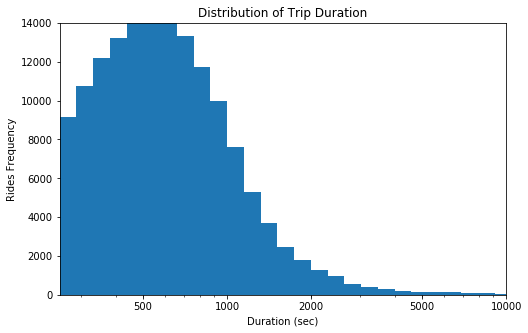

In [19]:
# The distribution doesn't tell us much about the variable, so let's put it on a log scale instead
log_binsize = 0.06
bins = 10 ** np.arange(2.4, np.log10(bike_df['duration_sec'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8,5])
plt.hist(data=bike_df, x='duration_sec', bins = bins);
plt.xscale('log');
plt.xticks([500, 1e3, 2e3, 5e3, 1e4, 2e4],[500, 1000, 2000, 5000, 10000, 20000]);
plt.axis([0, 10000, 0, 14000]);
plt.xlabel('Duration (sec)');
plt.ylabel('Rides Frequency');
plt.title('Distribution of Trip Duration')
plt.show()

## Distribution of Age of the Users

Age of the users varies from 21 to 120. Young people are the majority of the bike users. The plot is unimodal and is skewed to the right.

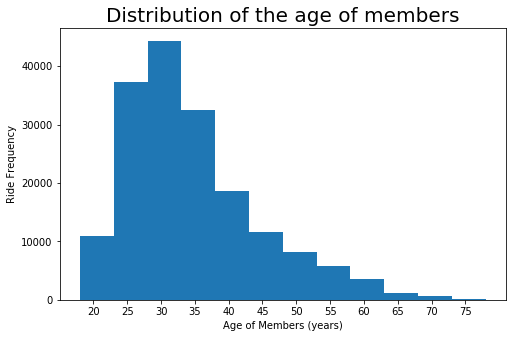

In [20]:
# Plotting for member_age
plt.figure(figsize=[8, 5])
bins = np.arange(18, 81, 5)

plt.hist(data=bike_df, x='member_age', bins=bins);
plt.xlabel('Age of Members (years)');
plt.xticks(np.arange(20, 80, 5));
plt.ylabel('Ride Frequency');
plt.title('Distribution of the age of members', size=20);

## Trip Duration vs User Type

Plotting the relationship using both a bar plot and a logarithmic transformed box plot produces a linear relationship. It is seen that Customers spend more time with the bikes than subscribers. Also there are alot of outliers for trips longer than 3000 seconds.

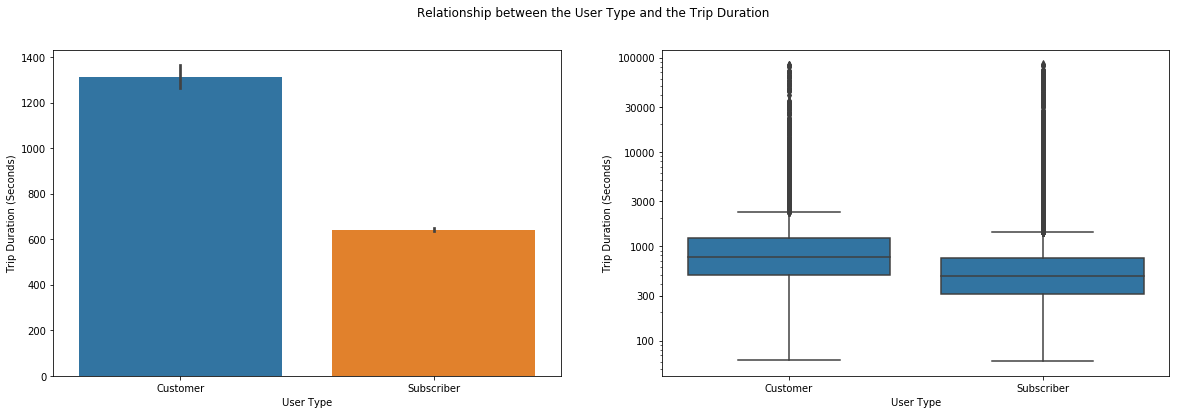

In [23]:
plt.figure(figsize=[20, 6])

base_color = sb.color_palette()[0]
plt.subplot(1, 2, 1)
sb.barplot(data=bike_df, x='user_type', y='duration_sec');
plt.xlabel('User Type');
plt.ylabel('Trip Duration (Seconds)');

plt.subplot(1, 2, 2)
sb.boxplot(data=bike_df, x='user_type', y='duration_sec', color=base_color);
plt.yscale('log');
y_ticklocs = [100, 300,  1e3, 3e3, 1e4, 3e4, 1e5]
y_ticklabels = [100, 300, 1000, 3000, 10000, 30000, 100000]
plt.yticks(y_ticklocs, y_ticklabels);
plt.xlabel('User Type');
plt.ylabel('Trip Duration (Seconds)');
plt.suptitle('Relationship between the User Type and the Trip Duration');


## Trip Duration vs Gender

plotting the relationship using simply a barplot. it can be observed that the **Other** gender spend the most time with the bikes, with **Male** gender spending the least time.

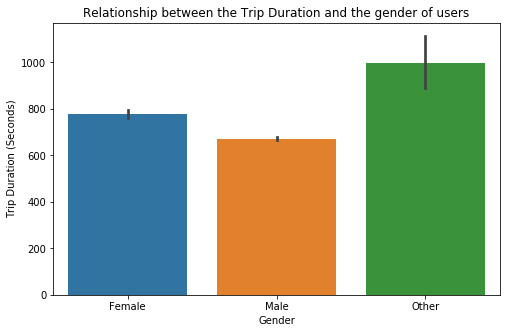

In [24]:
plt.figure(figsize=[8, 5])

sb.barplot(data=bike_df, x='member_gender', y='duration_sec');
plt.xlabel('Gender');
plt.ylabel('Trip Duration (Seconds)');
plt.title('Relationship between the Trip Duration and the gender of users');
